In [105]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable, Tuple
import math
from functools import cache

In [106]:
initial_conditions = {
  'x0': 1.0,
  'v0': 0.0,
  'dt': 0.01,
  'm': 1.0,
}

In [107]:
def verlet_algorithm(vn: float, xn, dt: float, a: Callable) -> Tuple[float, float]:
  vnphalf = vn + a(xn)*dt/2
  xnp1 = xn + vnphalf*dt
  vnp1 = vn + dt*(a(xn) + a(xnp1))/2
  return xnp1, vnp1


In [108]:
def lenard_jones_potential(x: float) -> float:
  return 4*(1/x**12 - 1/x**6)

In [109]:
def kinetic_energy(v: float) -> float:
  return v**2/2

In [110]:
@cache
def acceleration(x: float) -> float:
  return 24*(2/x**13 - 1/x**7)/initial_conditions['m']

plot phase diagram x(t) to v(t)

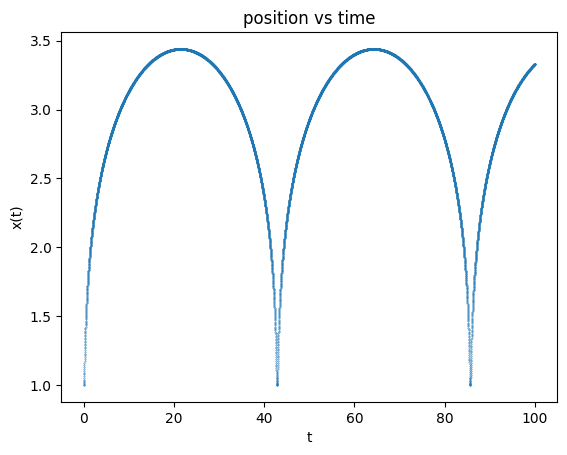

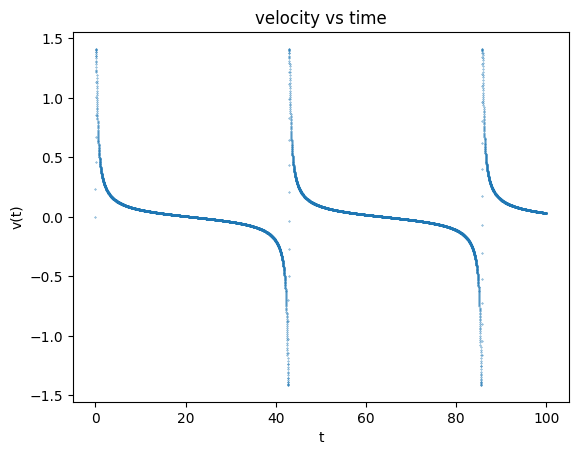

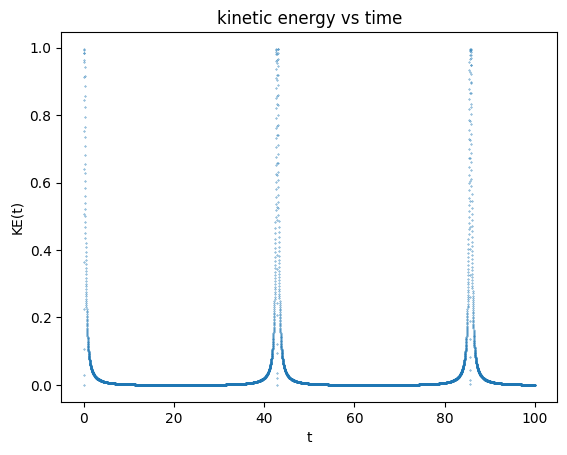

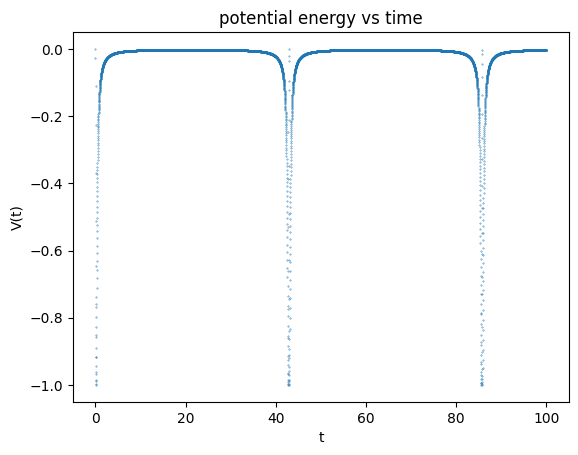

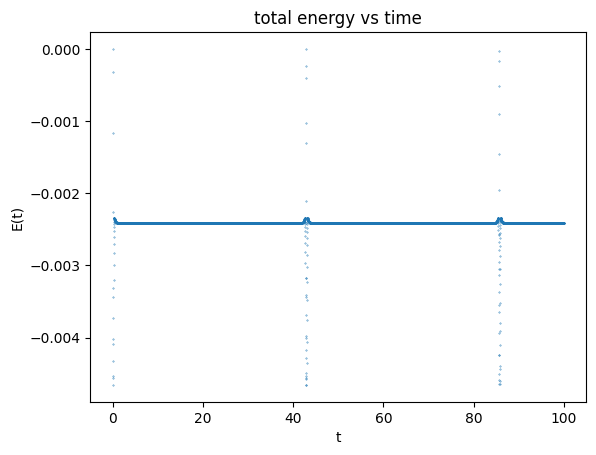

In [113]:
t = 0
t_end = 100
x_values = [initial_conditions['x0']]
v_values = [initial_conditions['v0']]
t_values = [t]
while t < t_end:
  x, v = verlet_algorithm(v_values[-1], x_values[-1], initial_conditions['dt'], acceleration)
  x_values.append(x)
  v_values.append(v)
  t += initial_conditions['dt']
  t_values.append(t)

plt.scatter(t_values, x_values, s=0.1)
plt.title('position vs time')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

plt.scatter(t_values, v_values, s=0.1)
plt.title('velocity vs time')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.show()

plt.scatter(t_values, [kinetic_energy(v) for v in v_values], s=0.1)
plt.title('kinetic energy vs time')
plt.xlabel('t')
plt.ylabel('KE(t)')
plt.show()

plt.scatter(t_values, [lenard_jones_potential(x) for x in x_values], s=0.1)
plt.title('potential energy vs time')
plt.xlabel('t')
plt.ylabel('V(t)')
plt.show()

plt.scatter(t_values, [kinetic_energy(v) + lenard_jones_potential(x) for x, v in zip(x_values, v_values)], s=0.1)
plt.title('total energy vs time')
plt.xlabel('t')
plt.ylabel('E(t)')
plt.show()

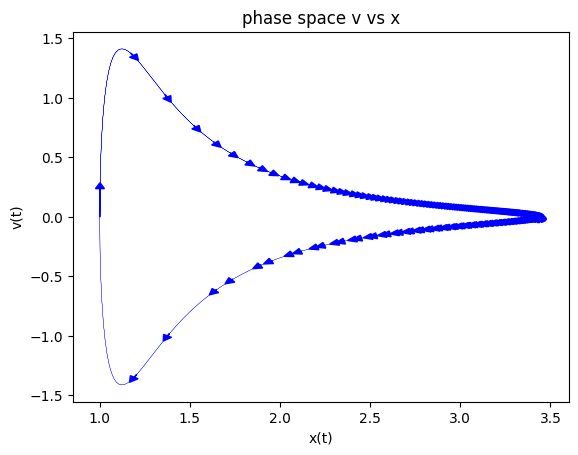

In [114]:
plt.plot(x_values, v_values, color='blue', linewidth=0.2)
plt.title('phase space v vs x')
for j in range(0, len(x_values) - 1, 50):
    plt.arrow(x_values[j], v_values[j], x_values[j+1] - x_values[j], v_values[j+1] - v_values[j], 
            fc='blue', ec='blue', head_width=0.05, head_length=0.05)
    
plt.xlabel('x(t)')
plt.ylabel('v(t)')
plt.show()